In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers,models,losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
#import pickle
import matplotlib.pyplot as plt

In [2]:
import zipfile
zip_ref = zipfile.ZipFile("animal_data.zip", 'r')
zip_ref.extractall("./")
zip_ref.close()
#

In [3]:
import tensorflow as tf
dataset = tf.keras.utils.image_dataset_from_directory(
    'animal_data',
    labels='inferred',
    label_mode='int',
    image_size=(64,64),
    batch_size=32,
    shuffle=True
)

Found 1944 files belonging to 15 classes.


In [4]:
for images, labels in dataset:
    print(images.shape)
    print(labels.shape)

(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 6

In [5]:
images_list = []
labels_list = []
for images, labels in dataset:
    images_list.extend(images.numpy())
    labels_list.extend(labels.numpy())

images = np.array(images_list)
labels = np.array(labels_list)

In [6]:
import sklearn
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [8]:
x_train.shape



(1555, 64, 64, 3)

In [9]:
y_train.shape

(1555,)

In [10]:
x_test.shape

(389, 64, 64, 3)

In [11]:
y_test.shape

(389,)

In [12]:
y_train = y_train.reshape(-1,)
y_train

array([ 3, 10,  6, ...,  2, 12,  8], dtype=int32)

In [13]:
len(y_train)

1555

In [14]:
y_test = y_test.reshape(-1,)
y_test

array([ 0,  7,  4,  6, 14, 11,  6, 14,  9,  5,  5,  9,  8, 10,  7,  6,  8,
       13,  4,  0,  5,  9,  0, 14,  5,  9,  8,  7,  2, 12, 11, 10, 13,  0,
        8, 10,  4,  5, 13,  2,  2,  2, 12,  3,  0, 10,  4, 10,  4,  7,  6,
        1, 14, 13, 13,  1,  8,  8,  1,  3, 12,  6,  2,  0,  6,  9, 14,  9,
        6,  1,  9,  1,  6, 13, 11, 14,  5,  7,  4, 12, 10,  5,  2,  2,  7,
        3,  9, 13, 14, 11,  6,  8,  3, 10,  5,  1,  8, 14, 14,  5, 11, 14,
        3,  6,  1, 10,  5, 10,  6,  9, 10, 14, 13, 11,  4,  9,  6,  6, 11,
       10, 12, 11,  6,  7,  1,  7, 12, 14, 11, 10, 12,  0,  3,  8,  7,  5,
        0,  3, 11,  7, 10, 11,  9,  5,  7,  6,  3,  0,  5, 13, 13,  3, 11,
        4,  7, 14,  3,  5,  0, 13,  4,  5,  0,  5,  8,  0,  8, 10,  1, 13,
        1,  5,  1,  9, 10,  9, 10,  7,  8,  9,  2, 14,  0,  9, 14,  3,  7,
       11,  3,  3,  1,  8,  9, 14,  8, 14,  5,  1,  2,  5,  3,  5, 10, 14,
        6, 11,  4,  5, 11, 14,  9,  8, 11,  3,  9,  1,  9, 13, 10,  1, 14,
        1,  4, 12, 12,  3

In [15]:
classes=["Bear","Bird","Cat","Cow","Deer","Dog","Dolphin","Elephant","Giraffe","Horse","Kangaroo","Lion","Panda","Tiger","Zebra"]

In [16]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.grid(False)
    plt.colorbar()
    plt.xlabel(classes[y[index]])

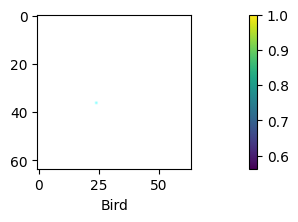

In [17]:
plot_sample(x=x_train,y=y_train,index=24)

In [18]:
len(y_train)

1555

In [19]:
x_train = x_train/255
x_test = x_test/255

In [20]:
'''
model = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(15)
                           ])
'''

"\nmodel = models.Sequential([\n    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)),\n    layers.MaxPooling2D((2,2)),\n\n    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),\n    layers.MaxPooling2D((2,2)),\n\n    layers.Flatten(),\n    layers.Dense(64,activation='relu'),\n    layers.Dense(15)\n                           ])\n"

In [22]:
'''
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
])
'''

"\nmodel = models.Sequential([\n    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(64, (3, 3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(128, (3, 3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n    layers.Flatten(),\n    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),\n    layers.Dropout(0.5),\n])\n"

In [23]:
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output and add Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
#model.compile(optimizer='adam',
#             loss=losses.SparseCategoricalCrossentropy(from_logits=True),
#             metrics=['accuracy'])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.1013 - loss: 2.6780
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1777 - loss: 2.5156
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2803 - loss: 2.2689
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3937 - loss: 1.9468
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4987 - loss: 1.6717
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6339 - loss: 1.2898
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7047 - loss: 1.0208
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8022 - loss: 0.6989
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8383 - loss: 0.5636
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9089 - loss: 0.3451
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9245 - loss: 0.2954
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

13/13 - 0s - 4ms/step - accuracy: 0.7326 - loss: 5.1103

Test accuracy: 0.7326478362083435


In [28]:
pred= model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [30]:
pred[0]


array([3.7475369e-21, 4.4900515e-17, 7.1867001e-01, 2.8133002e-01,
       4.4411379e-20, 1.2422857e-15, 1.7990431e-27, 2.8360563e-13,
       5.5470091e-33, 4.1710000e-26, 1.9790541e-11, 2.2687724e-18,
       3.1765931e-26, 3.1441575e-22, 1.5192635e-27], dtype=float32)

In [31]:
np.argmax(pred[0])

2

In [32]:
y_test[0]

0

In [41]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(15))
  plt.yticks([])
  thisplot = plt.bar(range(15), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

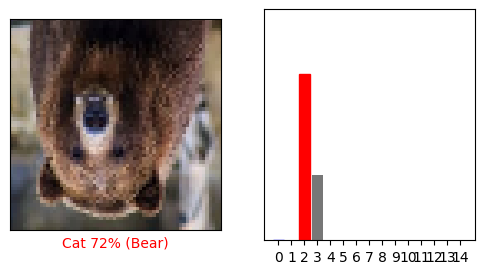

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  y_test)
plt.show()

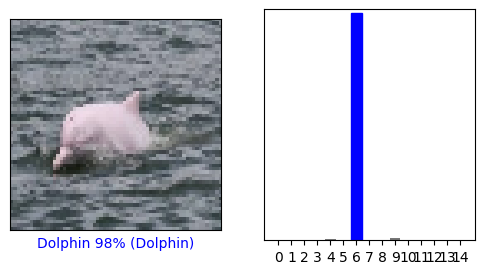

In [43]:
i=3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  y_test)
plt.show()

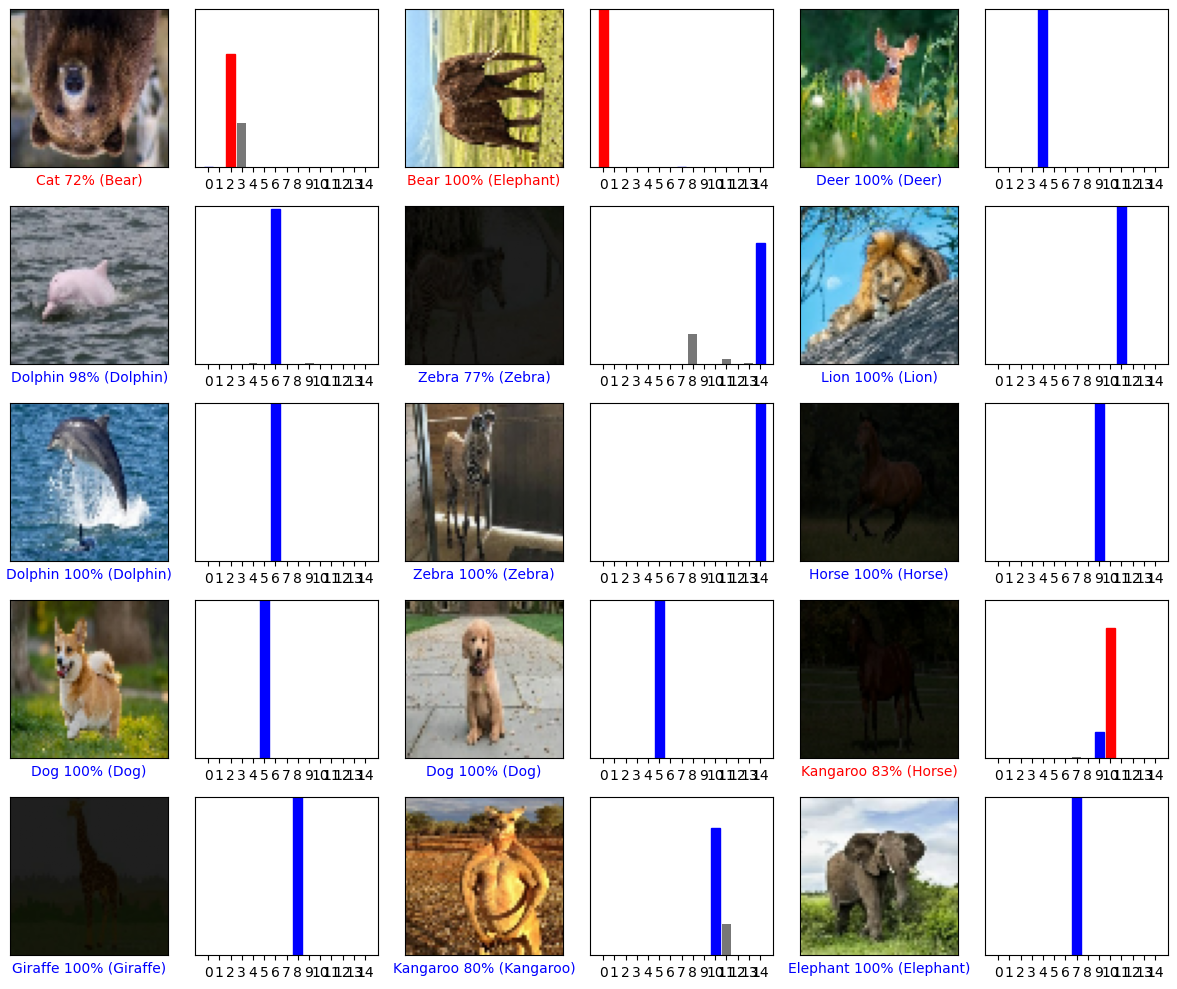

In [46]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred[i],y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred[i], y_test)
plt.tight_layout()
plt.show()